# Intro

* Bajamos el dataset
* Analizamos de manera basica el dataset (cantidad de filas, columnas,tipo de label, regresión, clasificación binaria, clasificación multiclase, etc)
* Limpiar el dataset (remover o hacer alguna operación sobre los nans)
* Ingeniería de features (correr test de correlación y encontrar buenas features para predecir la salida, etc.)
* Crear un modelo base-line que me permita obtener métricas iniciales de un modelo basico (en general un modelo constante y y luego uno lineal)
*  Crear modelos mas complejos como no lineales con deep-learning

# Load dataset

In [27]:
import numpy as np
import pandas as pd
import torch
from scipy import stats
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('/content/class_7_wine_dataset_v2.csv')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6497 non-null   int64  
 1   type                  6497 non-null   object 
 2   fixed acidity         6487 non-null   float64
 3   volatile acidity      6489 non-null   float64
 4   citric acid           6494 non-null   float64
 5   residual sugar        6495 non-null   float64
 6   chlorides             6495 non-null   float64
 7   free sulfur dioxide   6497 non-null   float64
 8   total sulfur dioxide  6497 non-null   float64
 9   density               6497 non-null   float64
 10  pH                    6488 non-null   float64
 11  sulphates             6493 non-null   float64
 12  alcohol               6497 non-null   float64
 13  quality               6497 non-null   int64  
 14  vendor_id             6497 non-null   int64  
dtypes: float64(11), int64

In [5]:
dataset.head()

,Unnamed: 0,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,vendor_id
0,0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,369
1,1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,361
2,2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,354
3,3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,325
4,4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,375


In [6]:
dataset.describe()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,vendor_id
count,6497.000000,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000,6497.000000
mean,3248.000000,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378,331.422657
std,1875.666681,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255,91.939412
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,1.000000
25%,1624.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,265.000000
50%,3248.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,330.000000
75%,4872.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,387.000000
max,6496.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,693.000000


Min value 3
Max value 9


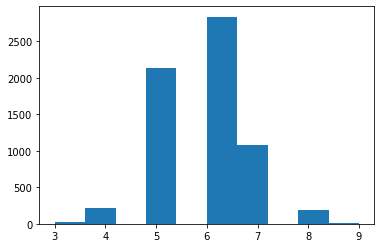

In [11]:
# Data analysis
quality = dataset.quality.to_numpy()
fig, ax1 = plt.subplots(1,1)
ax1.hist(quality)
print(f"Min value {quality.min()}")
print(f"Max value {quality.max()}")

In [12]:
dataset['quality_label'] = dataset.quality.apply(lambda label:0 if label<=6 else 1)
print(len(dataset[dataset['quality_label'] == 0]))
print(len(dataset[dataset['quality_label'] == 1]))

5220
1277


In [ ]:
dataset.describe()

# Clean Dataset

In [15]:
nans = dataset[dataset.isna().sum(axis=1) == 1]
print(nans.shape)

(30, 16)


In [16]:
ds = dataset[dataset.isna().sum(axis=1) == 0]
print(ds.shape)

(6463, 16)


# Feature engineering

In [17]:
ds.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6463 non-null   int64  
 1   type                  6463 non-null   object 
 2   fixed acidity         6463 non-null   float64
 3   volatile acidity      6463 non-null   float64
 4   citric acid           6463 non-null   float64
 5   residual sugar        6463 non-null   float64
 6   chlorides             6463 non-null   float64
 7   free sulfur dioxide   6463 non-null   float64
 8   total sulfur dioxide  6463 non-null   float64
 9   density               6463 non-null   float64
 10  pH                    6463 non-null   float64
 11  sulphates             6463 non-null   float64
 12  alcohol               6463 non-null   float64
 13  quality               6463 non-null   int64  
 14  vendor_id             6463 non-null   int64  
 15  quality_label        

**Tengo que transformar todas las variables/columnas categóricas en algo que mi modelo pueda interpretar**

In [19]:
ds.type.unique() # Debo mapearlo a dos variables one hot encoding

array(['white', 'red'], dtype=object)

In [20]:
y = pd.get_dummies(ds.type, prefix="type")
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   type_red    6463 non-null   uint8
 1   type_white  6463 non-null   uint8
dtypes: uint8(2)
memory usage: 63.1 KB


In [21]:
# Concatenar las dummies al dataset principal
ds = pd.concat([ds,y], axis=1)
ds.info

<bound method DataFrame.info of       Unnamed: 0   type  fixed acidity  ...  quality_label  type_red  type_white
0              0  white            7.0  ...              0         0           1
1              1  white            6.3  ...              0         0           1
2              2  white            8.1  ...              0         0           1
3              3  white            7.2  ...              0         0           1
4              4  white            7.2  ...              0         0           1
...          ...    ...            ...  ...            ...       ...         ...
6491        6491    red            6.8  ...              0         1           0
6492        6492    red            6.2  ...              0         1           0
6494        6494    red            6.3  ...              0         1           0
6495        6495    red            5.9  ...              0         1           0
6496        6496    red            6.0  ...              0         1         

In [24]:
len(ds.vendor_id.unique()) # Variable categórica de alta cardinalidad
# En este caso vamos a descargar el vendor_id

500

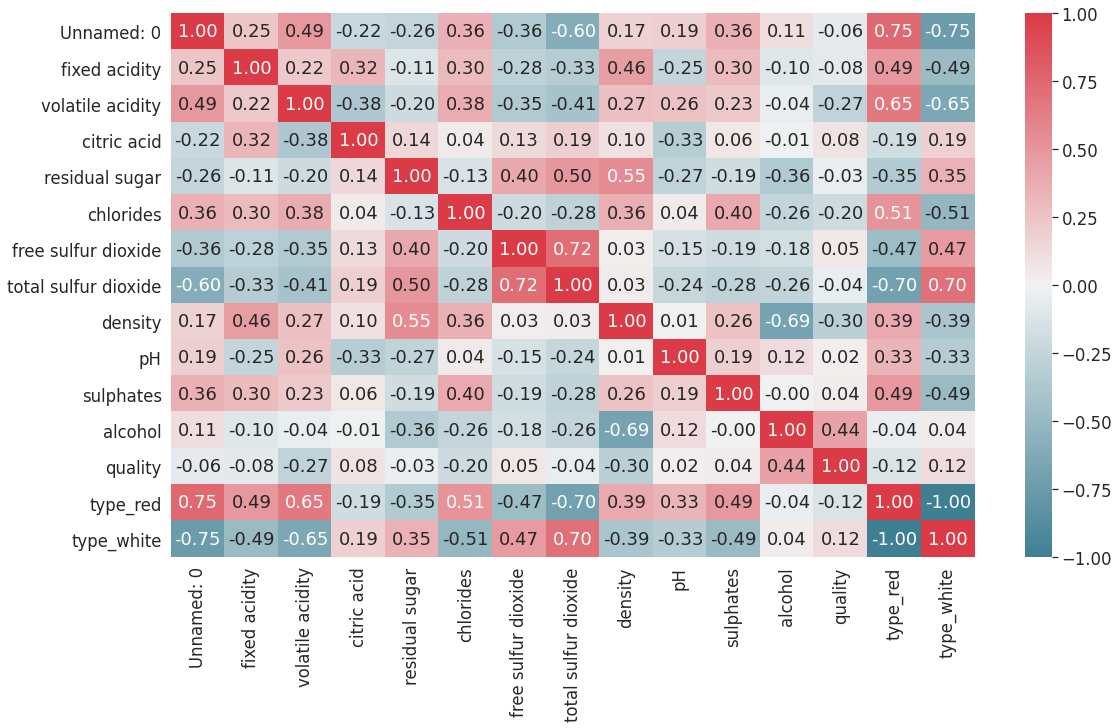

In [33]:
corr = ds.loc[:, (ds.columns != 'vendor_id') & (ds.columns != 'type') & (ds.columns != 'quality_label')].corr()
fig, ax1 = plt.subplots(1,figsize=(18,10))
sns.set(style="ticks", color_codes=True, font_scale=1.5)
sns.heatmap(corr,cmap=sns.diverging_palette(220,10,as_cmap=True),annot=True, fmt=".2f")
sns.set(font_scale=1.5)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


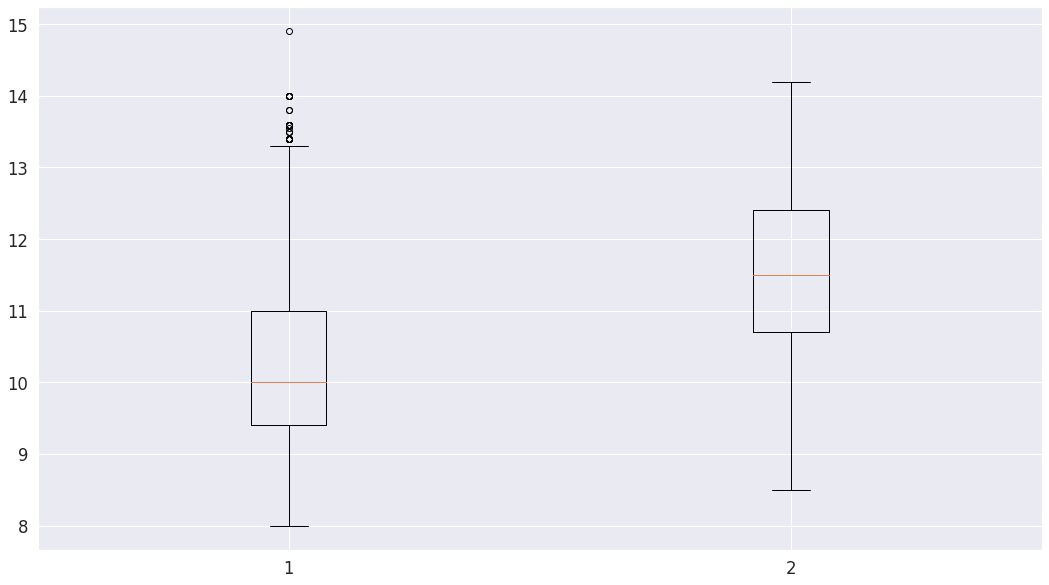

In [37]:
fig, ax1= plt.subplots(1, figsize = (18,10))
_ = ax1.boxplot([dataset.loc[dataset['quality_label'] == 0, 'alcohol'],\
                 [dataset.loc[dataset['quality_label'] == 1, 'alcohol']]])

In [109]:
# Nos vamos a quedar con las variables queq vamos a usar para el fit final del modelo
final_ds = ds.drop(['Unnamed: 0','quality_label','quality','vendor_id','type'],axis=1, inplace=False)

In [110]:
final_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6463 non-null   float64
 1   volatile acidity      6463 non-null   float64
 2   citric acid           6463 non-null   float64
 3   residual sugar        6463 non-null   float64
 4   chlorides             6463 non-null   float64
 5   free sulfur dioxide   6463 non-null   float64
 6   total sulfur dioxide  6463 non-null   float64
 7   density               6463 non-null   float64
 8   pH                    6463 non-null   float64
 9   sulphates             6463 non-null   float64
 10  alcohol               6463 non-null   float64
 11  type_red              6463 non-null   uint8  
 12  type_white            6463 non-null   uint8  
dtypes: float64(11), uint8(2)
memory usage: 938.5 KB


In [111]:
final_ds = final_ds.to_numpy()
label = ds.quality_label.to_numpy()

# Normalizacion de dats

Cuando sabemos q las columnas tienen una distribución gaussiana, aplicamos estandarización ( media y desvio estandar). 
Cuando no sabemos, usamos normalizacion (restamos minimo y dividimos por escala)

In [112]:
normalized_data = (final_ds - np.min(final_ds, axis=0)) / (np.max(final_ds, axis=0) - np.min(final_ds, axis=0))

# Dataset split

In [113]:
n = normalized_data.shape[0]
idx = np.random.permutation(np.arange(0,n))
train_idx = idx[:int(0.8* n)]
test_idx = idx[int(0.8* n):]
assert len(train_idx) + len(test_idx) == len(idx)

In [114]:
X_train = normalized_data[train_idx,:]
y_train = label[train_idx]

X_test = normalized_data[test_idx,:]
y_test = label[test_idx]

In [115]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5170, 13)
(5170,)
(1293, 13)
(1293,)


# Logistic regression

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

lr_model = LogisticRegression(C=1, solver='sag', max_iter=1000)
lr_model.fit(X_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
lr_test_scores = lr_model.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, lr_test_scores[:,1])
print(metrics.auc(fpr,tpr))

0.8024103203309603


# Random forest

In [118]:
rf_model = RandomForestClassifier(n_estimators=1000, max_depth=None, random_state=0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [119]:
rf_test_scores = rf_model.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_test_scores[:,1])
print(metrics.auc(fpr,tpr))

0.9193915317616291


# Deep Learning

In [161]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [162]:
class CustomDataset(Dataset):
  def __init__(self, X, Y):
    self.X=X
    self.Y=Y

  def __len__(self):
    return self.X.shape[0]

  def __getitem__(self, idx):
    return self.X[idx,:], self.Y[idx]

In [163]:
training_set = CustomDataset(X_train, y_train)
test_set = CustomDataset(X_test, y_test)

In [164]:
training_dataloader = DataLoader(training_set,batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_set,batch_size=len(test_set), shuffle= True)

In [165]:
class NNet(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_1 = torch.nn.Linear(in_features=13, out_features=20, bias = True)
    self.relu_1 = torch.nn.ReLU()
    self.linear_2 = torch.nn.Linear(in_features=20, out_features=5, bias = True)
    self.relu_2 = torch.nn.ReLU()
    self.linear_3 = torch.nn.Linear(in_features=5, out_features=1, bias = True)

  def forward(self, x):
    # X es el batch que va a entrar
    z1 = self.linear_1(x)
    a1 = self.relu_1 (z1)
    z2 = self.linear_2(a1)
    a2 = self.relu_2 (z2)
    y = self.linear_3(a2)
    return y

In [166]:
nnet = NNet()

In [167]:
print(nnet)

NNet(
  (linear_1): Linear(in_features=13, out_features=20, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=20, out_features=5, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=5, out_features=1, bias=True)
)


In [168]:
criterion = torch.nn.BCEWithLogitsLoss(reduction='sum') # criterion. 'sum' suma todos los errores!
optimizer = torch.optim.Adam(nnet.parameters(),lr=0.01) # En realidad termina usando minibatch

In [169]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
nnet.to(device)
for epoch in range(500):
  
  running_loss = 0
  nnet.train()
  for i, data in enumerate(training_dataloader):
    # data es una tupla batch (data, label)
    x, y = data #todavia esta en numpy
    x = x.to(device).float() #convierte a tensores y pasa a GPU si esta disponible
    y = y.to(device).float() #convierte a tensores y pasa a GPU si esta disponible

    # set gradient to zero
    optimizer.zero_grad()

    # forward
    y_hat = nnet(x)

    # loss
    loss = criterion(y_hat[:,0], y)
    
    # backward
    loss.backward()

    # update of parameters
    optimizer.step()

    # compute loss and statistics
    running_loss += loss.item()

  nnet.eval()
  nnet_test_scores = []
  truth = []
  for i, data in enumerate(test_dataloader):
    x, y = data #todavia esta en numpy
    x = x.to(device).float() #convierte a tensores y pasa a GPU si esta disponible
    y = y.to(device).float() #convierte a tensores y pasa a GPU si esta disponible
    y_hat = nnet(x)
    y_hat = torch.sigmoid(y_hat)
    truth += list(y.detach().numpy())
    nnet_test_scores += list(y_hat.detach().numpy())

  fpr, tpr, thresholds = metrics.roc_curve(truth, nnet_test_scores)
  auc= metrics.auc(fpr,tpr)
  print(f"Epoch = {epoch} | loss = {running_loss/len(training_set)} | auc = {auc}")

Epoch = 0 | loss = 0.5075517562187387 | auc = 0.7140650450023323
Epoch = 1 | loss = 0.4389787913752248 | auc = 0.7795765116119017
Epoch = 2 | loss = 0.41334451605319056 | auc = 0.7900375465508408
Epoch = 3 | loss = 0.4050617756649881 | auc = 0.7979674392640571
Epoch = 4 | loss = 0.40024531768415145 | auc = 0.7965317233943305
Epoch = 5 | loss = 0.3994774134062245 | auc = 0.7992635981983773
Epoch = 6 | loss = 0.39738661214507526 | auc = 0.8000053528687554
Epoch = 7 | loss = 0.40305556845157703 | auc = 0.8014123926558641
Epoch = 8 | loss = 0.398584259593971 | auc = 0.8015041561202407
Epoch = 9 | loss = 0.3994943672268718 | auc = 0.8016800360936293
Epoch = 10 | loss = 0.394176271021712 | auc = 0.8047999938824356
Epoch = 11 | loss = 0.39458353994432227 | auc = 0.8053811624901546
Epoch = 12 | loss = 0.3926210707806526 | auc = 0.8052741051150485
Epoch = 13 | loss = 0.3952158985101047 | auc = 0.8048516108311476
Epoch = 14 | loss = 0.39283171493264646 | auc = 0.8073330478469997
Epoch = 15 | los